In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [14]:
bos_19 = pd.read_excel('../Too_Large/bos_19_charts.xlsx', sheet_name='bos_19', skiprows=1)
bos_19.shape

(26656, 46)

In [15]:
bos_19.columns

Index(['Bib', 'Name', 'Age', 'Gender', 'City', 'State', 'Country', 'Citizen',
       'Column1', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj_Time', 'Column2', 'Official_Time_Text',
       'Official_Time', 'Overall', 'Gender2', 'Division', '2020_Open_standard',
       '2020_Age_Factor', '2020_Age_Best', '2020_AG_%', '2020_AG_Result',
       '2020_Age-graded_place', '2020_Place_Difference', '2015_Open_standard',
       '2015_Age_Factor', '2015_Age_Best', '2015_AG_%', '2015_AG_Result',
       '2015_Age-graded_place', '2015_Place_Difference', 'Age Group',
       'No Ranking', 'Local Class', 'Regional Class', 'National Class',
       'World Class'],
      dtype='object')

Text(0, 0.5, 'Time')

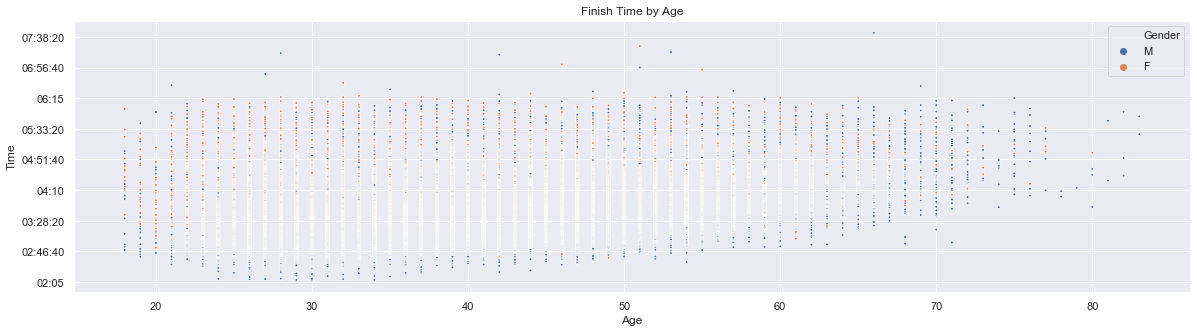

In [16]:
#use
sns.set(style="darkgrid")

plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="Age", y="Official_Time", hue="Gender",
                     data=bos_19, s=8)
plt.title('Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Time')
#plt.savefig('finishbyage.png');

In [19]:
females = bos_19[bos_19['Gender'].isin(['F'])]
females.head()

,Bib,Name,Age,Gender,City,State,Country,Citizen,Column1,5K,...,2015_AG_%,2015_AG_Result,2015_Age-graded_place,2015_Place_Difference,Age Group,No Ranking,Local Class,Regional Class,National Class,World Class
35,F2,"Degefa, Worknesh",28,F,Assela,NaN,ETH,NaN,NaN,00:17:34,...,0.943561,02:23:31,67,-31,18-39,0.6,0.1,0.1,0.1,0.1
37,F4,"Kiplagat, Edna",39,F,Uasin Gishu,NaN,KEN,NaN,NaN,00:17:36,...,0.962366,02:20:42.732000,42,-4,18-39,0.6,0.1,0.1,0.1,0.1
47,F7,"Hasay, Jordan",27,F,Arroyo Grande,CA,USA,NaN,NaN,00:17:35,...,0.931766,02:25:20,85,-37,18-39,0.6,0.1,0.1,0.1,0.1
51,F6,"Assefa, Meskerem",27,F,Addis Ababa,NaN,ETH,NaN,NaN,00:17:35,...,0.929634,02:25:40,91,-39,18-39,0.6,0.1,0.1,0.1,0.1
60,F1,"Linden, Desiree",35,F,Washington,MI,USA,NaN,NaN,00:17:35,...,0.928070,02:25:54.732000,95,-34,18-39,0.6,0.1,0.1,0.1,0.1


Text(0, 0.5, 'Time')

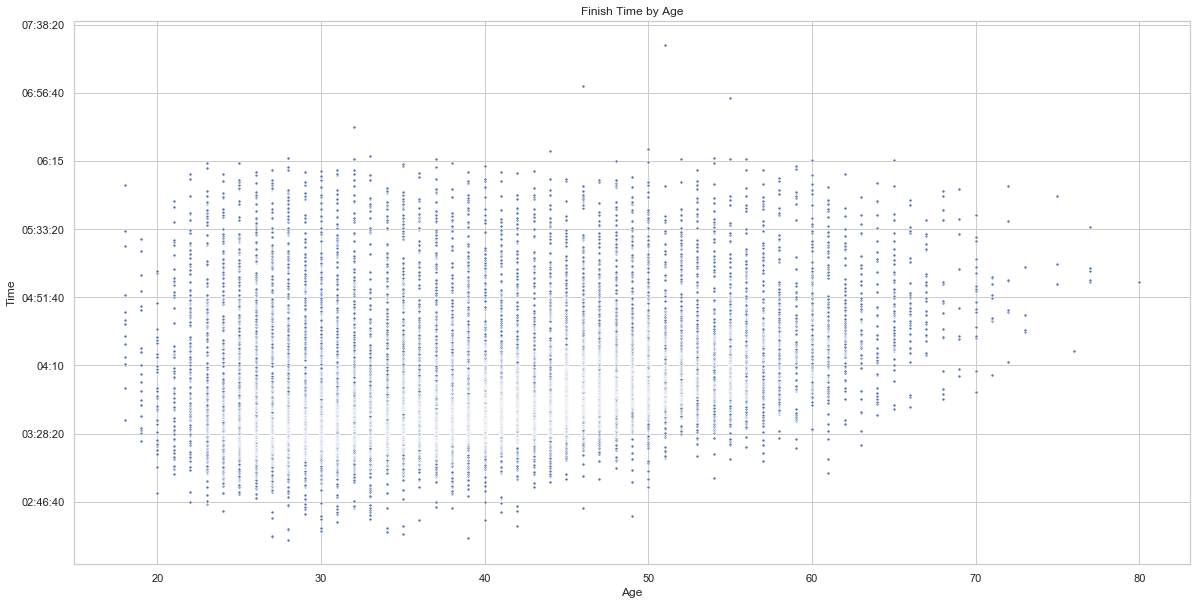

In [23]:
#use
#sns.set(style="darkgrid")
sns.set_style("whitegrid")

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="Age", y="Official_Time",
                     data=females, s=10)
plt.title('Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Time')
#plt.savefig('finishbyage.png');

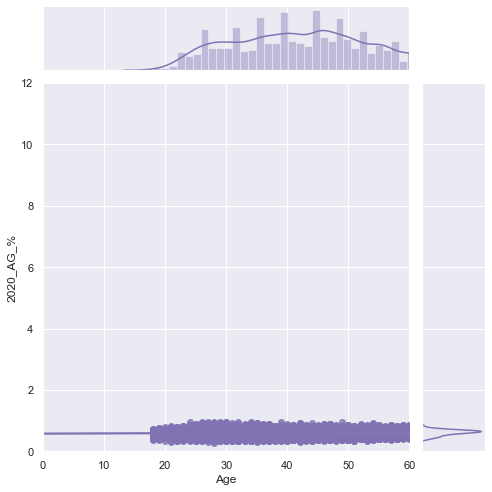

In [13]:
#tips = sns.load_dataset("tips")
g = sns.jointplot("Age", "2020_AG_%", data=bos_19,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [7]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>

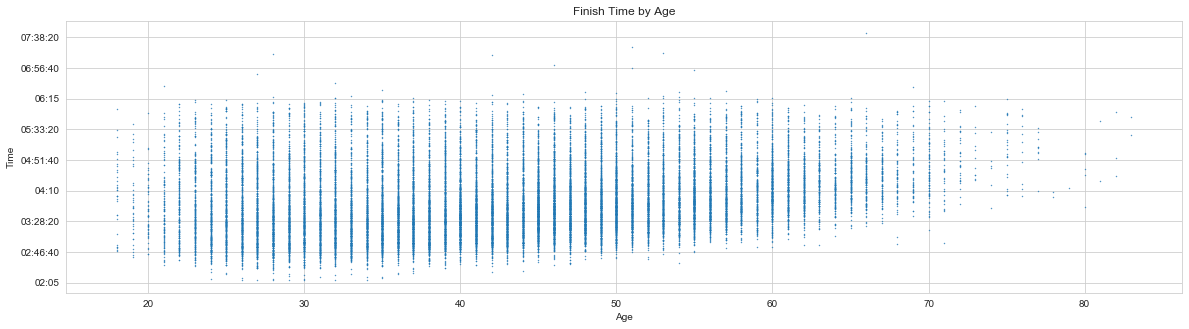

In [131]:
#Smaller markers
plt.figure(figsize=(20,5))

plt.plot( 'Age', 'Official_Time', data=bos_19, linestyle='', marker='o', markersize=0.4)
plt.xlabel('Age')
plt.ylabel('Time')
plt.title('Finish Time by Age');

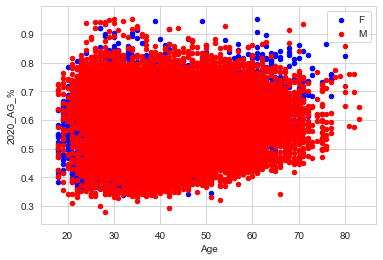

In [156]:
#not using seaborn, using groupby and specifying colors

fig, ax = plt.subplots()

colors = {'M':'red', 'F':'blue'}

grouped = bos_19.groupby('M/F')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Age', y='2020_AG_%', label=key, color=colors[key])

plt.show()

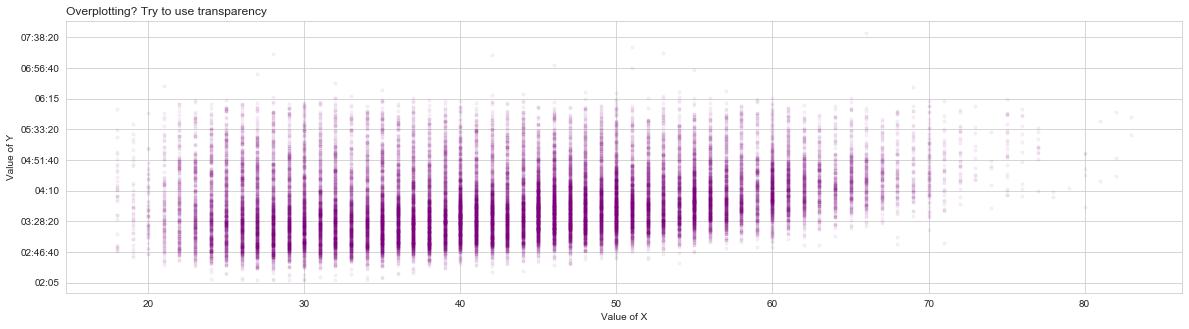

In [134]:
#transparency
plt.figure(figsize=(20,5))

plt.plot( 'Age', 'Official_Time', data=bos_19, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left');


Text(0.0, 1.0, '2020 AG % by Age')

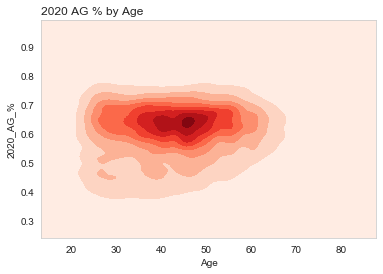

In [158]:
#2D Density; can't use datetime column
sns.kdeplot(bos_19.Age, bos_19['2020_AG_%'], cmap="Reds", shade=True)
plt.title('2020 AG % by Age', loc='left')


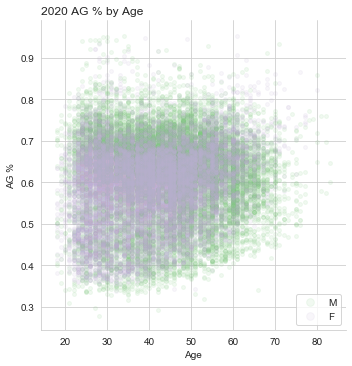

In [71]:
#Putative structure
sns.lmplot( x="Age", y="2020_AG_%", data=bos_19, fit_reg=False, hue='M/F', legend=False, 
           palette="Accent", scatter_kws={"alpha":0.1,"s":15} )
 
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Age')
plt.ylabel('AG %')
plt.title('2020 AG % by Age', loc='left');


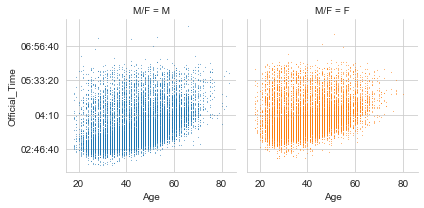

In [136]:
#maybe use
#FacetGrid by Gender

g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age", "Official_Time", s=.005));

#g = sns.FacetGrid(tips, col="sex", hue="time", palette=pal,
 #                 hue_order=["Dinner", "Lunch"],
  #                hue_kws=dict(marker=["+", "v"]))
#g = (g.map(plt.scatter, "total_bill", "tip", **kws)
    # .add_legend())

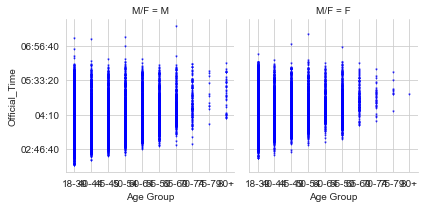

In [118]:
g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age Group", "Official_Time", s=1, edgecolor="b"))

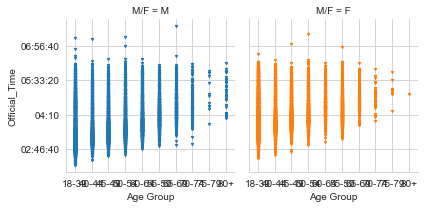

In [121]:
#FacetGrid by Gender
g = sns.FacetGrid(bos_19, col="M/F", hue="M/F", hue_kws=dict(marker=["v","v"]))
g = (g.map(plt.scatter, "Age Group", "Official_Time", s=5))

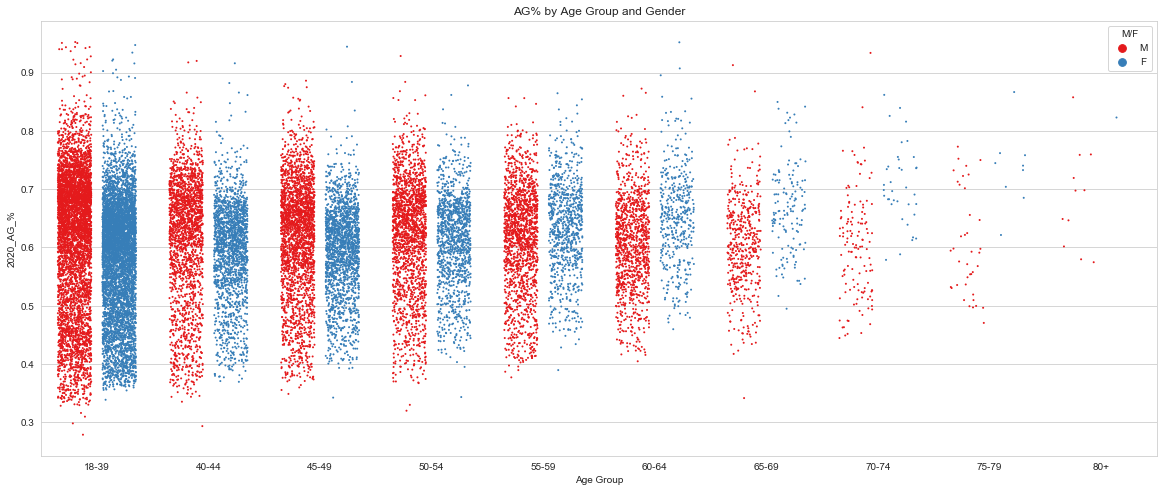

In [192]:
#use
plt.figure(figsize=(20,8))
ax = sns.stripplot(x="Age Group", y="2020_AG_%", hue="M/F",
                   data=bos_19, palette="Set1", dodge=True, jitter=0.3, size=2, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
plt.title('AG% by Age Group and Gender');

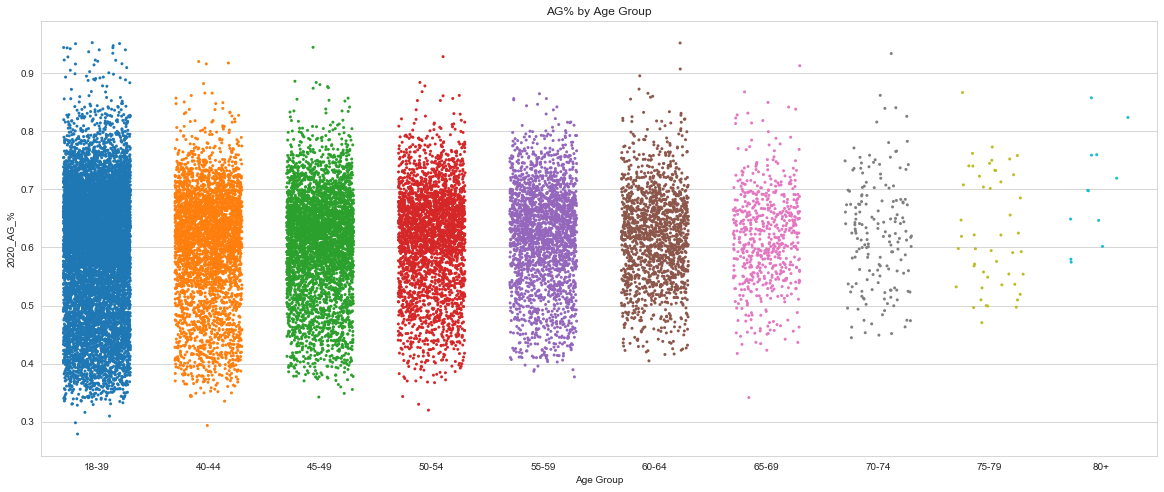

In [182]:
#use
#jitter
plt.figure(figsize=(20,8));

sns.stripplot(bos_19['Age Group'], bos_19['2020_AG_%'], jitter=0.3, size=3, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
plt.title('AG% by Age Group');

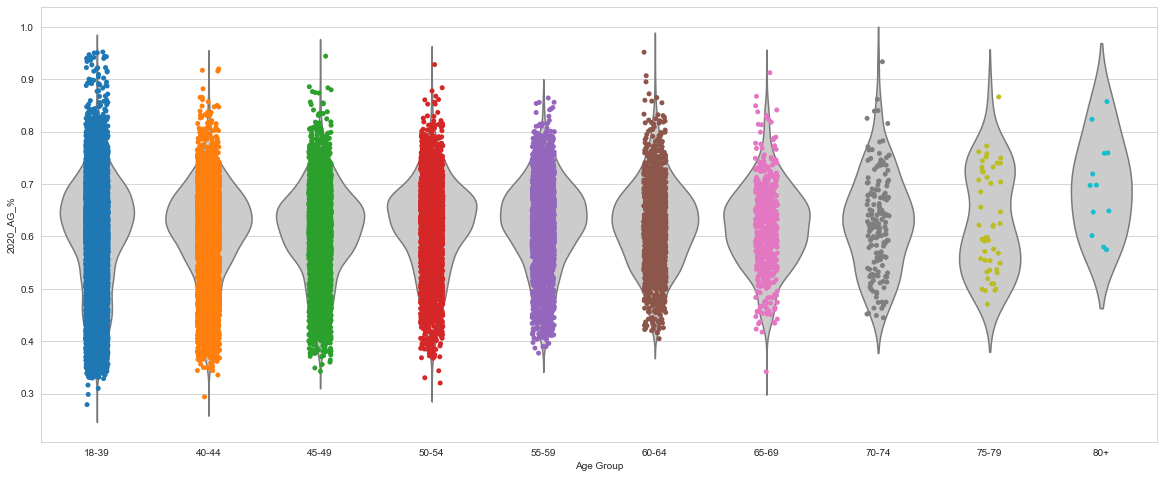

In [199]:
plt.figure(figsize=(20,8))
ax = sns.violinplot(x="Age Group", y="2020_AG_%", data=bos_19,
                    inner=None, color=".8",order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="Age Group", y="2020_AG_%", data=bos_19, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])

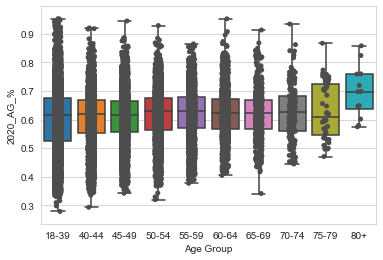

In [200]:
ax = sns.boxplot(x="Age Group", y="2020_AG_%", data=bos_19, whis=np.inf, order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])
ax = sns.stripplot(x="Age Group", y="2020_AG_%", data=bos_19, color=".3", order=["18-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80+"])

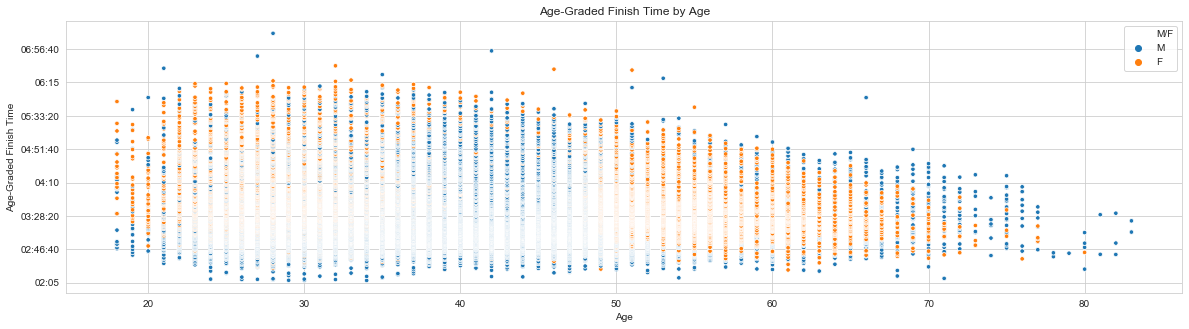

In [196]:
#use
plt.figure(figsize=(20,5))

ax = sns.scatterplot(x="Age", y="2020_AG_Result", hue="M/F",
                     data=bos_19, s=20)
plt.title('Age-Graded Finish Time by Age')
plt.xlabel('Age')
plt.ylabel('Age-Graded Finish Time');

In [27]:
bos_19_by_age_group = bos_19.groupby('Age Group')
print(bos_19_by_age_group)